<a href="https://colab.research.google.com/github/ShawnLiu119/Fraud_Detection_Credit/blob/main/Feature_Engineer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Engineer - Fraud Transaction**



#### Why we need engineer the features? <br>

Machine learning algorithms typically require numerical and ordered features. Numerical means that the type of the variable must be an integer or a real number. Ordered means that the order of the values of a variable is meaningful.

In this dataset, the only numerical and ordered features are the transaction amount and the fraud label. The date is a Panda timestamp, and therefore not numerical. The identifiers for the transactions, customers, and terminals are numerical but not ordered: it would not make sense to assume for example that the terminal with ID 3548 is 'bigger' or 'larger' than the terminal with ID 1983. Rather, these identifiers represent distinct 'entities', which are referred to as categorical features.

### Feature Transformation that are used relevant for payment card farud detection

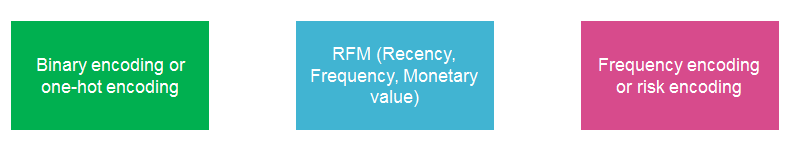

1. The first type of transformation involves the date/time variable, and consists in creating binary features that characterize potentially relevant periods. We will create two such features. **The first one will characterize whether a transaction occurs during a weekday or during the weekend. The second will characterize whether a transaction occurs during the day or the night.** These features can be useful since it has been observed in real-world datasets that fraudulent patterns differ between weekdays and weekends, and between the day and night.

2. The second type of transformation involves the **customer ID** and consists in creating features that characterize the **customer spending behaviors**. We will follow the **RFM (Recency, Frequency, Monetary value)** framework proposed in {cite}VANVLASSELAER201538, and keep track of the average spending amount and number of transactions for each customer and for **three window sizes**. This will lead to the creation of six new features.

3. The third type of transformation involves the **terminal ID** and consists in creating new features that characterize the **'risk' associated with the terminal. The risk will be defined as the average number of frauds that were observed on the terminal** for **three window sizes**. This will lead to the creation of three new features.

In [ ]:
DIR_INPUT='./simulated-data-raw/data/'

BEGIN_DATE = "2018-04-01"
END_DATE = "2018-09-30"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))